scale (dist/pixel) =  11.67
units =  nm


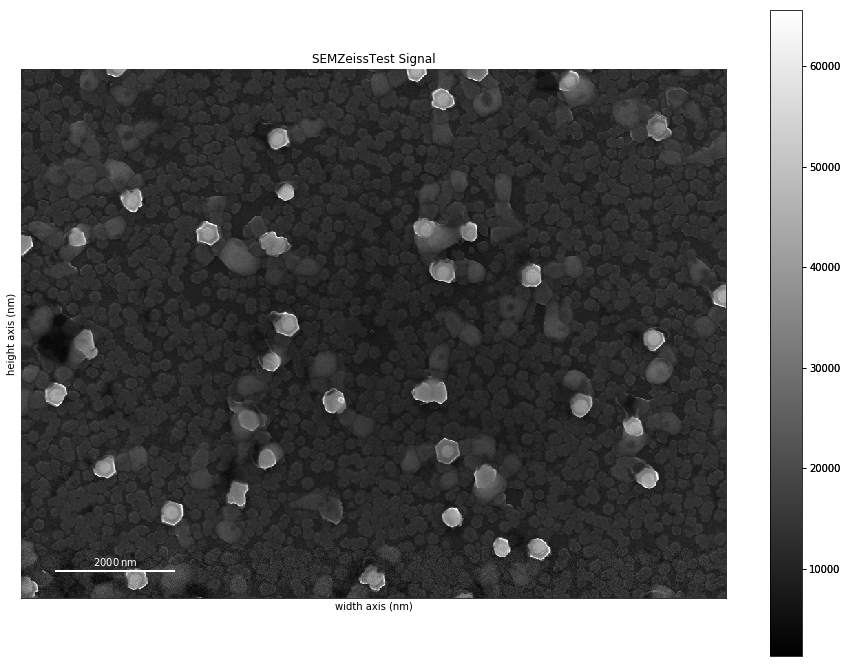

In [33]:
import hyperspy.api as hs
import numpy as np
import matplotlib
matplotlib.use('nbagg')

# switch off the too many warnings...
import warnings
warnings.filterwarnings('ignore')

s=hs.load('sampledata/SEMZeissTest.tif')

#print(s.original_metadata)

#if you want to look into the Zeiss metadata:
zeiss_meta = s.original_metadata['sem_metadata']

#hyperspy automatically infers the scaling of the images
print('scale (dist/pixel) = ',s.axes_manager[0].scale)
print('units = ',s.axes_manager[0].units)
aspect=s.axes_manager[0].size / s.axes_manager[1].size

# you can also use the gui to inspect the scale and change it
s.axes_manager.gui() 

# note also the scalebar that appears:
s.plot()

#increase the image size of a hyperspy plot
#call this after the plot is created, any other way?
fig = matplotlib.pyplot.gcf()
figsize=10
fig.set_size_inches(aspect*figsize,figsize)





In [25]:
# make the metadata mor readable and iterable
tab=[]
for x in zeiss_meta :
    try :
        u = x[1][2]
    except:
        u=''
    tab.append((x[0],x[1][0],x[1][1],u))
    
import pandas as pd
from IPython.display import display

meta = pd.DataFrame(tab[1:-1])
meta.columns=['exifkey','parameter','value','unit']
#searching in the metadata:
display(meta[(meta.parameter.str.find('Aperture')>=0)])

#display all:
pd.set_option('display.max_rows',30)
display(meta)



,exifkey,parameter,value,unit
12,ap_aperture_align_x,Aperture Align X,-100,%
13,ap_aperture_align_y,Aperture Align Y,24,%
14,ap_aperture_at_fisheye_x,Aperture value at FishEye X,0,%
15,ap_aperture_at_fisheye_y,Aperture value at FishEye Y,0,%
16,ap_aperture_x,Aperture at X,0,%
17,ap_aperture_y,Aperture at Y,0,%
18,ap_apertureposn_x,Aperture Posn X,5,mm
19,ap_apertureposn_y,Aperture Posn Y,1,mm
20,ap_aperturesize,Aperture Size,30,µm
76,ap_beam_blank_aperture_x,Beam Blanked Aperture Pos X,100,%


,exifkey,parameter,value,unit
0,ap_actualcurrent,Fil I,2.32,A
1,ap_actualext,Extractor V,4.36,kV
2,ap_actualkv,EHT,25,kV
3,ap_actuallens,Liner Tube,0,kV
4,ap_actualsupp,Suppressor V,270,V
5,ap_alias_wd,Focus,15.8,mm
6,ap_align1_x,Align 1 X,-1.8,%
7,ap_align1_y,Align 1 Y,-14.8,%
8,ap_angular_0,Aa 1,0,°
9,ap_angular_1,Aa 2,0,°
